# The Lion, the Witch and the Wardrobe
### Book analysis and insight gathering using NLP

### Dhruv Panchal



<img src="title.jpg" width=700 />


In [310]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import nltk
import fileinput
import nltk, re
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image


#### Import the book as a text file

In [311]:
dataset = open("Book1.txt", "r").read()

In [312]:
dataset

'CHAPTER I\n\nLucy Looks into a Wardrobe\n\nOnce there were four children whose names were Peter, Susan, Edmund and Lucy. This story is about something that happened to them when they were sent away from London during the war because of the air-raids. They were sent to the house of an old Professor who lived in the heart of the country, ten miles from the nearest railway station and two miles from the nearest post office. He had no wife and he lived in a very large house with a housekeeper called Mrs. Macready and three servants. (Their names were Ivy, Margaret and Betty, but they do not come into the story much.) He himself was a very old man with shaggy white hair, which grew over most of his face as well as on his head, and they liked him almost at once; but on the first evening when he came out to meet them at the front door he was so odd-looking that Lucy (who was the youngest) was a little afraid of him, and Edmund (who was the next youngest) wanted to laugh and had to keep on pr

#### We can see the data contains lot of unnecessary special characters, we will remove those using regex 

In [313]:
import re
regex = re.compile('[^a-zA-Z]')
data1 = regex.sub(' ', dataset)
data1

'CHAPTER I  Lucy Looks into a Wardrobe  Once there were four children whose names were Peter  Susan  Edmund and Lucy  This story is about something that happened to them when they were sent away from London during the war because of the air raids  They were sent to the house of an old Professor who lived in the heart of the country  ten miles from the nearest railway station and two miles from the nearest post office  He had no wife and he lived in a very large house with a housekeeper called Mrs  Macready and three servants   Their names were Ivy  Margaret and Betty  but they do not come into the story much   He himself was a very old man with shaggy white hair  which grew over most of his face as well as on his head  and they liked him almost at once  but on the first evening when he came out to meet them at the front door he was so odd looking that Lucy  who was the youngest  was a little afraid of him  and Edmund  who was the next youngest  wanted to laugh and had to keep on preten

The data is now clean and contains only characters, this is what we want!

We now move on to lemmatise the data into its base form

In [314]:
from nltk.tokenize import sent_tokenize
paragraphs = sent_tokenize(dataset)

paragraphs

In [315]:
lemmatizer = WordNetLemmatizer()

# Tokenize: Split the sentence into words
word_list = nltk.word_tokenize(data1)

# Lemmatize list of words and join
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
lemmatized_output

'CHAPTER I Lucy Looks into a Wardrobe Once there were four child whose name were Peter Susan Edmund and Lucy This story is about something that happened to them when they were sent away from London during the war because of the air raid They were sent to the house of an old Professor who lived in the heart of the country ten mile from the nearest railway station and two mile from the nearest post office He had no wife and he lived in a very large house with a housekeeper called Mrs Macready and three servant Their name were Ivy Margaret and Betty but they do not come into the story much He himself wa a very old man with shaggy white hair which grew over most of his face a well a on his head and they liked him almost at once but on the first evening when he came out to meet them at the front door he wa so odd looking that Lucy who wa the youngest wa a little afraid of him and Edmund who wa the next youngest wanted to laugh and had to keep on pretending he wa blowing his nose to hide it 

All the derived words have been brought to their base words and we can not proceed further!

In [316]:
file = open("testfile.txt", "w")
file.write(lemmatized_output) 
file.close()

# Variability
‘The Lion, the Witch and the Wardrobe’ has a volume of close to 40K words. Lewis used 3000 different distinct words to tell his story in the first book, leading to a variability of around 8%. Variability is in this case calculated as the distinct words divided by the total words in the text, also known as Type-Text Ratio (TTR). It is one of many different measures of the complexity of the text, the richness of the vocabulary and to what degree repetitions are avoided

In [317]:
split = data1.split()
split
#we take the data and split it into words

['CHAPTER',
 'I',
 'Lucy',
 'Looks',
 'into',
 'a',
 'Wardrobe',
 'Once',
 'there',
 'were',
 'four',
 'children',
 'whose',
 'names',
 'were',
 'Peter',
 'Susan',
 'Edmund',
 'and',
 'Lucy',
 'This',
 'story',
 'is',
 'about',
 'something',
 'that',
 'happened',
 'to',
 'them',
 'when',
 'they',
 'were',
 'sent',
 'away',
 'from',
 'London',
 'during',
 'the',
 'war',
 'because',
 'of',
 'the',
 'air',
 'raids',
 'They',
 'were',
 'sent',
 'to',
 'the',
 'house',
 'of',
 'an',
 'old',
 'Professor',
 'who',
 'lived',
 'in',
 'the',
 'heart',
 'of',
 'the',
 'country',
 'ten',
 'miles',
 'from',
 'the',
 'nearest',
 'railway',
 'station',
 'and',
 'two',
 'miles',
 'from',
 'the',
 'nearest',
 'post',
 'office',
 'He',
 'had',
 'no',
 'wife',
 'and',
 'he',
 'lived',
 'in',
 'a',
 'very',
 'large',
 'house',
 'with',
 'a',
 'housekeeper',
 'called',
 'Mrs',
 'Macready',
 'and',
 'three',
 'servants',
 'Their',
 'names',
 'were',
 'Ivy',
 'Margaret',
 'and',
 'Betty',
 'but',
 'they',
 '

In [318]:
setl = len(set(split))
lens = len(split)
#we create a list of unique words from the data
#We find the length of the dataset and the unique word list

In [319]:
setl

3639

In [320]:
setl/lens *100

9.451702553180438

## Word clouds

In [321]:
dataset = open("Book1b.txt", "r").read()

def create_word_cloud(string):
   maskArray = np.array(Image.open("lion.png"))
   cloud = WordCloud(background_color = "white", max_words = 1000, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("wordCloud.png")
    
dataset = dataset.lower()
create_word_cloud(dataset)

## Removing stop words and tokenising

In [322]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(data1) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
        
#print(word_tokens)
print(filtered_sentence)

['CHAPTER', 'I', 'Lucy', 'Looks', 'Wardrobe', 'Once', 'four', 'children', 'whose', 'names', 'Peter', 'Susan', 'Edmund', 'Lucy', 'This', 'story', 'something', 'happened', 'sent', 'away', 'London', 'war', 'air', 'raids', 'They', 'sent', 'house', 'old', 'Professor', 'lived', 'heart', 'country', 'ten', 'miles', 'nearest', 'railway', 'station', 'two', 'miles', 'nearest', 'post', 'office', 'He', 'wife', 'lived', 'large', 'house', 'housekeeper', 'called', 'Mrs', 'Macready', 'three', 'servants', 'Their', 'names', 'Ivy', 'Margaret', 'Betty', 'come', 'story', 'much', 'He', 'old', 'man', 'shaggy', 'white', 'hair', 'grew', 'face', 'well', 'head', 'liked', 'almost', 'first', 'evening', 'came', 'meet', 'front', 'door', 'odd', 'looking', 'Lucy', 'youngest', 'little', 'afraid', 'Edmund', 'next', 'youngest', 'wanted', 'laugh', 'keep', 'pretending', 'blowing', 'nose', 'hide', 'As', 'soon', 'said', 'good', 'night', 'Professor', 'gone', 'upstairs', 'first', 'night', 'boys', 'came', 'girls', 'room', 'talke

In [323]:
#filtered_sentence

In [324]:
len(filtered_sentence)

19526

We have now reduced the length of the book by nearly 50% by removing filler words

In [325]:
counter = Counter(filtered_sentence)
counter.most_common(10)

[('said', 535),
 ('I', 408),
 ('And', 247),
 ('Lucy', 216),
 ('Edmund', 190),
 ('Aslan', 161),
 ('But', 154),
 ('Peter', 146),
 ('Beaver', 136),
 ('It', 131)]

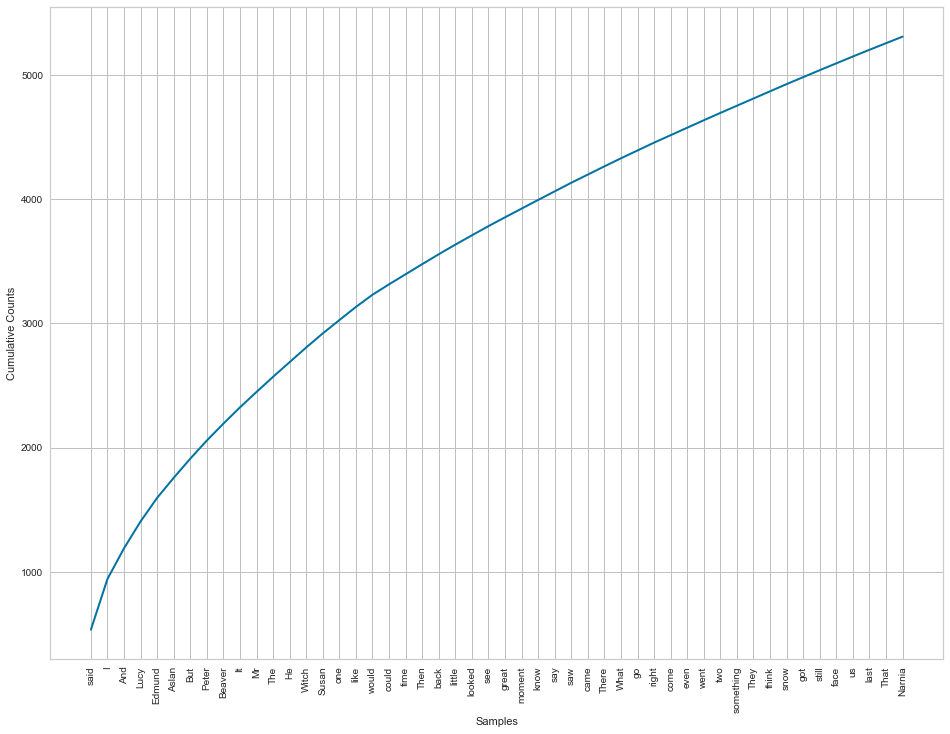

In [326]:
fdist = nltk.FreqDist(filtered_sentence)
fig, ax = plt.subplots(figsize=(16,12))
ax = fdist.plot( 50,cumulative=True)

From the graph we observe that nearly 2% of lemmatised words make up nearly 18% of the whole book

counter = Counter(word_tokens)
counter.most_common()

### Finding the main characters from the text

In [327]:
from nltk.tag import pos_tag
tagged_sent = pos_tag(filtered_sentence)
propernouns = [word for word,pos in tagged_sent if pos == 'NNP']

We use Part of Speech tagger to find out the proper nouns in the book.

In [336]:
propernouns
counter = Counter(propernouns)
counter = counter.most_common()

In [329]:
propernouns

['Lucy',
 'Looks',
 'Wardrobe',
 'Peter',
 'Susan',
 'Edmund',
 'Lucy',
 'London',
 'Professor',
 'Mrs',
 'Macready',
 'Ivy',
 'Margaret',
 'Betty',
 'Lucy',
 'Edmund',
 'Professor',
 'Peter',
 'Susan',
 'Oh',
 'Edmund',
 'Don',
 'Susan',
 'Mother',
 'Edmund',
 'Go',
 'Hadn',
 'Lucy',
 'No',
 'Peter',
 'Anyway',
 'Lucy',
 'Peter',
 'Did',
 'Lucy',
 'Snakes',
 'Edmund',
 'Foxes',
 'Susan',
 'Edmund',
 'Professor',
 'Do',
 'Ed',
 'Susan',
 'Ten',
 'Peter',
 'Everyone',
 'Nothing',
 'Peter',
 'Lucy',
 'Lucy',
 'Soon',
 'Lucy',
 'Lucy',
 'Lucy',
 'Lucy',
 'Lucy',
 'Lucy',
 'Christmas',
 'Faun',
 'Lucy',
 'Goodness',
 'Faun',
 'CHAPTER',
 'II',
 'Lucy',
 'Lucy',
 'Faun',
 'Faun',
 'Excuse',
 'Daughter',
 'Eve',
 'My',
 'Lucy',
 'Faun',
 'Lucy',
 'Human',
 'Lucy',
 'Faun',
 'How',
 'Son',
 'Adam',
 'Daughter',
 'Eve',
 'Delighted',
 'Allow',
 'My',
 'Tumnus',
 'Mr',
 'Tumnus',
 'Lucy',
 'O',
 'Lucy',
 'Daughter',
 'Eve',
 'Mr',
 'Tumnus',
 'Narnia',
 'Narnia',
 'Lucy',
 'Narnia',
 'Faun',
 '

In [330]:
import pandas as pd
df_names = pd.DataFrame(counter[:10],columns=['words', 'count'])
df_names =df_names.drop([5])

In [331]:
df_names

,words,count
0,Lucy,216
1,Edmund,183
2,Aslan,159
3,Peter,146
4,Beaver,134
6,Susan,113
7,Witch,112
8,Narnia,53
9,Faun,49


We have created a dataframe of the main charaters based on their occourances in the text and added a counter next to them

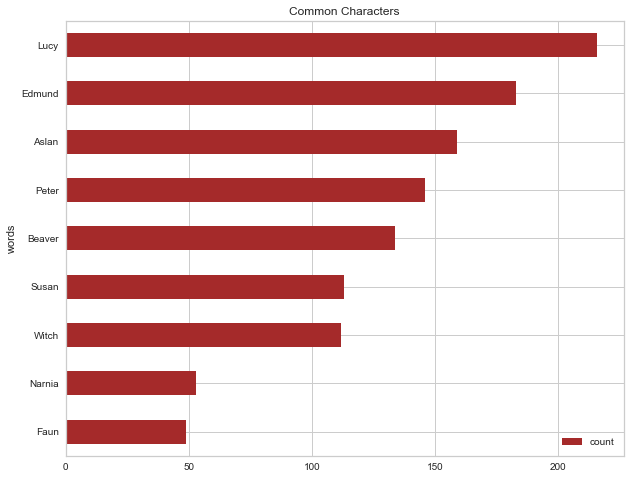

In [332]:
fig, ax = plt.subplots(figsize=(10,8))
df_names.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="BROWN")
ax.set_title("Common Characters")
plt.show()

#### We can see from this who all are major characters in the book and who the story revolves around

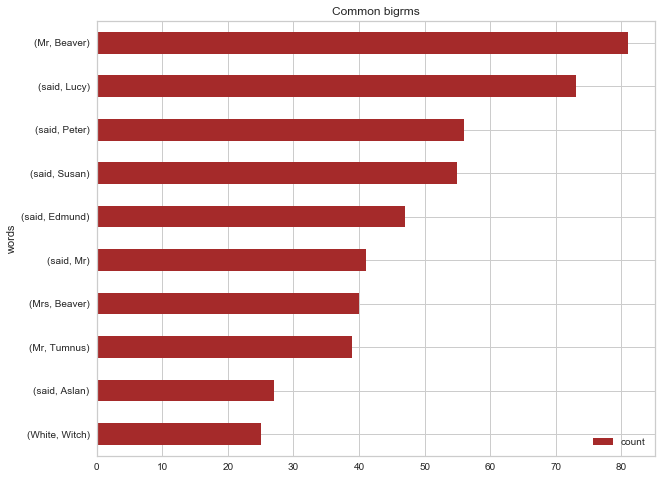

In [333]:
bigrm = list(nltk.bigrams(filtered_sentence))
counter_bigrm = Counter(bigrm)
counter_bigrm =counter_bigrm.most_common()
counter_bigrm[:15]
df_bigrm = pd.DataFrame(counter_bigrm[:10],columns=['words', 'count'])
df_bigrm
fig, ax = plt.subplots(figsize=(10, 8))
df_bigrm.sort_values(by='count').plot.barh(x='words',y='count',ax=ax, color="BROWN")
ax.set_title("Common bigrms")
plt.show()

#### from this plot we can see distribution of dialogues

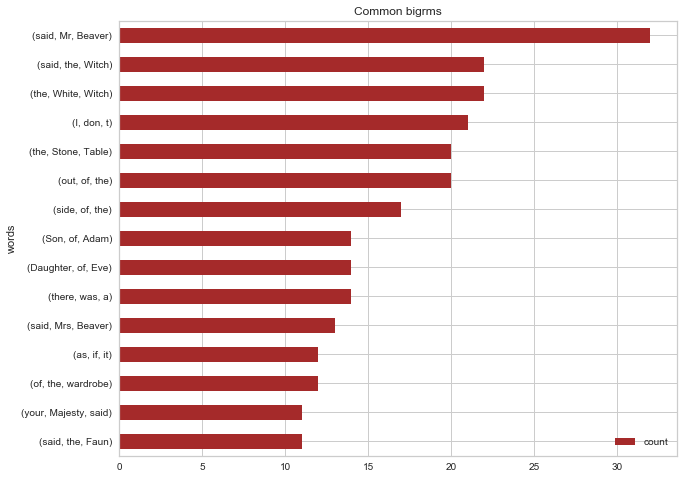

In [334]:
trigm = list(nltk.trigrams(word_tokens))
counter_trigm = Counter(trigm)
counter_trigm =counter_trigm.most_common()
counter_trigm[:15]
df_trigm = pd.DataFrame(counter_trigm[:15],columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(10, 8))
df_trigm.sort_values(by='count').plot.barh(x='words',y='count',ax=ax, color="BROWN")
ax.set_title("Common bigrms")
plt.show()

The above plot tells us about some terms in the book that were previosuly unknown

 !pip3 install --user yellowbrick

### Plotting character footprints

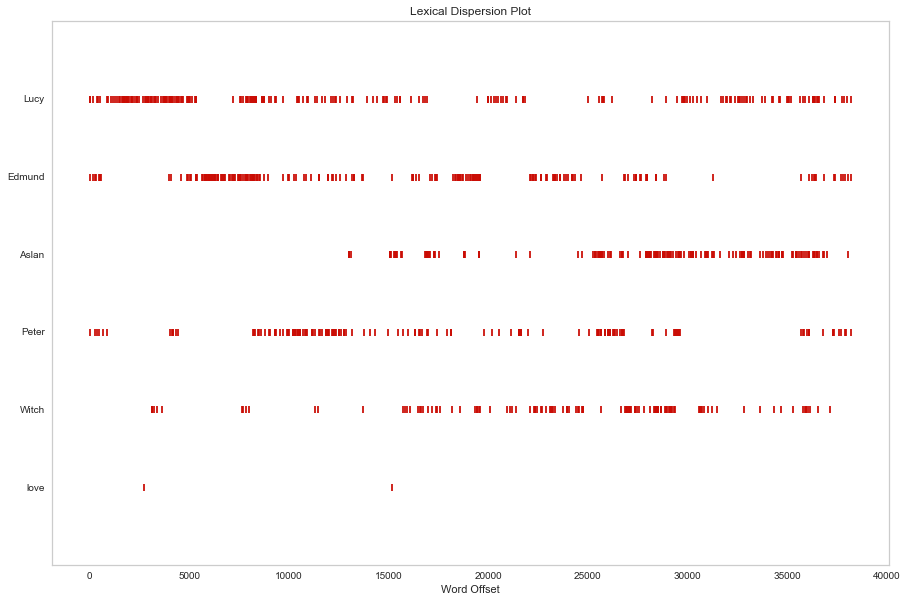

In [350]:
from yellowbrick.text import DispersionPlot
corpus = word_tokens
text = [doc.split() for doc in corpus]
target_words = ['Lucy', 'Edmund', 'Aslan', 'Peter', 'Witch','love']
target_words1 = ['like','Narnia']


visualizer = DispersionPlot(target_words, color='red')
fig, ax = plt.subplots(figsize=(15, 10))
visualizer.fit(text)
visualizer.show()

From the above graph we can see which character is played in what part of the story.
